# Importing Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset= pd.read_excel('heart_failure_clinical_records_dataset.xlsx')
dataset.head(10)

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1
5  90.0        1                        47  ...        1     8            1
6  75.0        1                       246  ...        0    10            1
7  60.0        1                       315  ...        1    10            1
8  65.0        0                       157  ...        0    10            1
9  80.0        1                       123  ...        1    10            1

[10 rows x 13 columns]

Seperating the output column

In [ ]:
y=dataset.iloc[:,-1]
x=dataset.iloc[:,:]
x.drop(["DEATH_EVENT"], axis = 1, inplace = True)
x.head(10)

age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
0  75.0        0                       582  ...    m        0     4
1  55.0        0                      7861  ...    m        0     6
2  65.0        0                       146  ...    m        1     7
3  50.0        1                       111  ...    m        0     7
4  65.0        1                       160  ...    f        0     8
5  90.0        1                        47  ...    m        1     8
6  75.0        1                       246  ...    m        0    10
7  60.0        1                       315  ...    m        1    10
8  65.0        0                       157  ...    f        0    10
9  80.0        1                       123  ...    m        1    10

[10 rows x 12 columns]

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

#Data Exploration

In [ ]:
x.shape

(299, 12)

In [ ]:
x.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
dtype: int64

In [ ]:
x.describe()

age     anaemia  ...    smoking        time
count  299.000000  299.000000  ...  299.00000  299.000000
mean    60.833893    0.431438  ...    0.32107  130.260870
std     11.894809    0.496107  ...    0.46767   77.614208
min     40.000000    0.000000  ...    0.00000    4.000000
25%     51.000000    0.000000  ...    0.00000   73.000000
50%     60.000000    0.000000  ...    0.00000  115.000000
75%     70.000000    1.000000  ...    1.00000  203.000000
max     95.000000    1.000000  ...    1.00000  285.000000

[8 rows x 11 columns]

There are no missing values from the dataset as seen below

In [ ]:
pd.isnull(dataset).values.any()

False

# Data Preprocessing


In [ ]:
x_columns=x.columns

OneHotEncoding the sex column from m,f to 1,0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False ) 
x['sex'] = ohe.fit_transform(x['sex'].values.reshape(-1, 1))

Breaking x and y randomly into train and test sets in a 80,20 ratio 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1)


Normalising x test and x train using Standard Scaler 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_n = sc_x.fit_transform(x_train)
x_test_n = sc_x.fit_transform(x_test)

# Data Mining

We have used Classification and Lime:

We need to predict if a particular heart failure patient will survive within the checkup period. Thus based on the input information you need to predict if the person servives or not. There are two different outputs options 1 for dies and o for survives. Thus we use classification algorithm to predict the reuslt. The two classes being 1 for dies and 0 for survives. 

After building the classification algorithm we use lime algorithm to find the features that contribute most to the result so we can find the most relevent features for the output. And we can find the features that have the least relevance





# Logistic Regression

We use logistic regression to perform classification. The accuracy is 0.82 , 0.87


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_n, y_train)

prediction = logreg.predict(x_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train_n, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test_n, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.87


# Decision Tree Classifier

We use decision tree classifier to perform classification. The accuracy is 1, 0.77

In [ ]:
from sklearn.tree import DecisionTreeClassifier
regressor_dtr = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(regressor_dtr.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(regressor_dtr.score(x_test, y_test)))
prediction=regressor_dtr.predict(x_test)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.80


We plot the decision tree

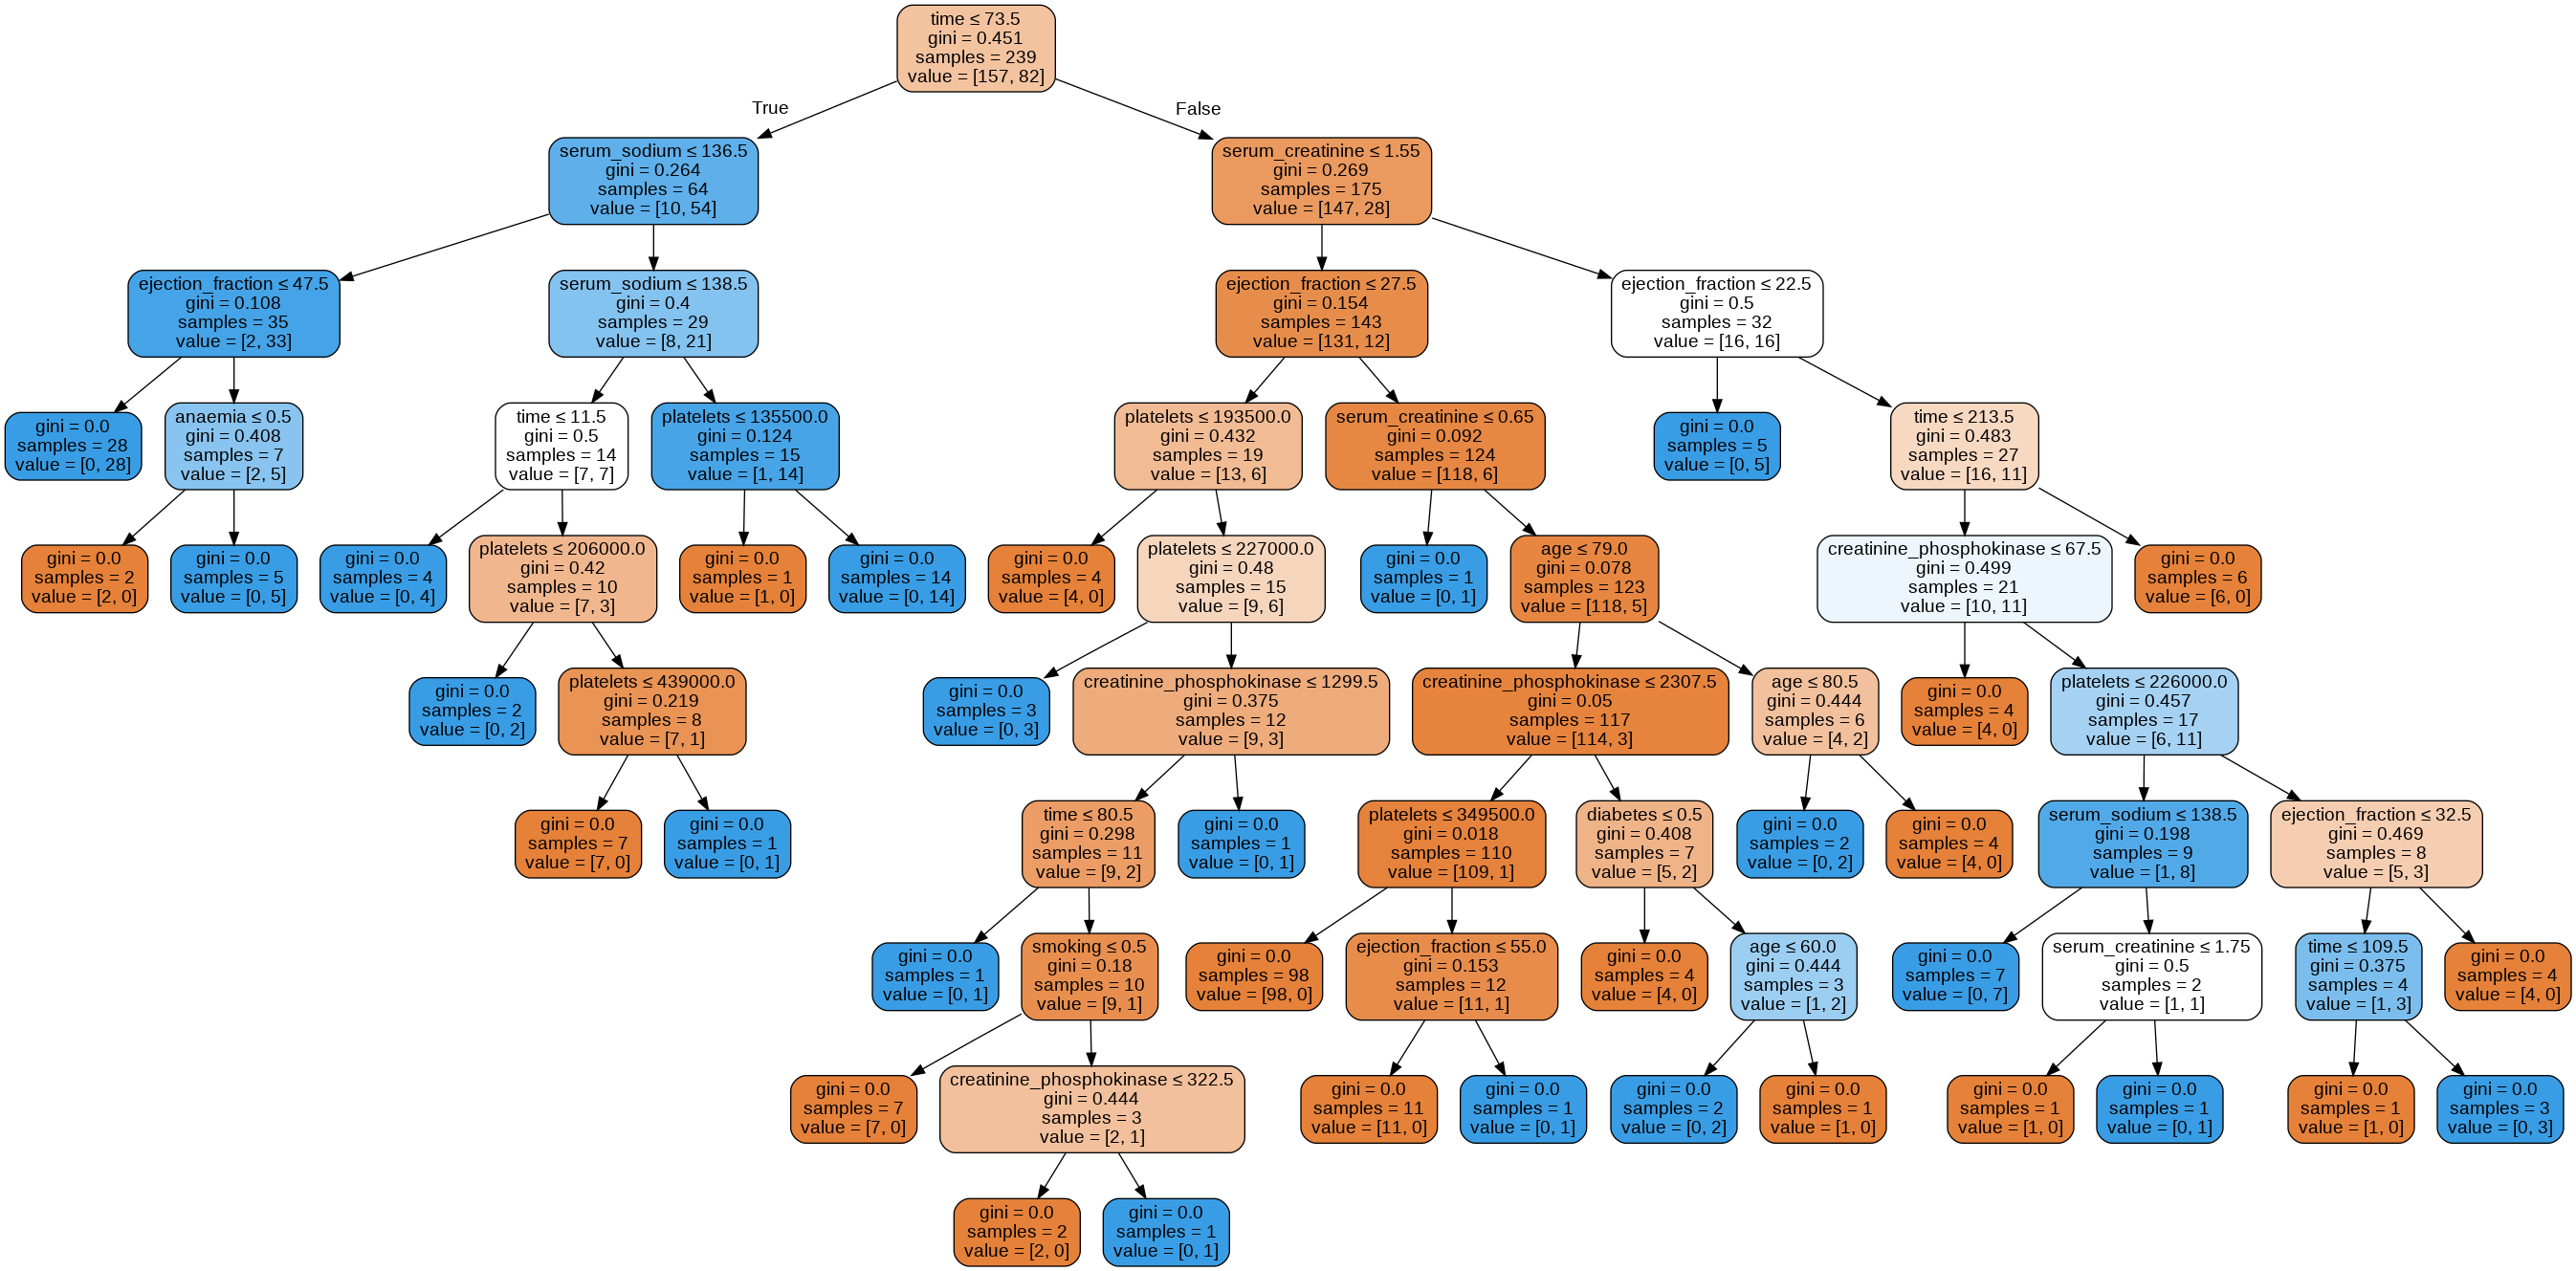

In [ ]:
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn.tree import export_graphviz 
import pydotplus
dot_data = StringIO()
export_graphviz(regressor_dtr, out_file=dot_data, feature_names=x.columns,
                filled=True, rounded=True,
special_characters=True, )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Gaussian Naive Bayes

We use Gaussian Naive Bayes to perform classification. The accuracy is 0.76,0.82

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_n, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train_n, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test_n, y_test)))
prediction=gnb.predict(x_test)

Accuracy of GNB classifier on training set: 0.76
Accuracy of GNB classifier on test set: 0.82


# Support Vector Machine

We use Support Vector Machine to perform classification. The accuracy is 0.89,0.85

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_n, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train_n, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test_n, y_test)))
prediction=svm.predict(x_test)

Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.85


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = regressor_dtr.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[39  7]
 [ 5  9]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        46
           1       0.56      0.64      0.60        14

    accuracy                           0.80        60
   macro avg       0.72      0.75      0.73        60
weighted avg       0.81      0.80      0.80        60



Decision Tree classification is selected, it has the highest accuracy rate for the training set

# Data Visualization

The number of people surviving vs death is shown below. It shows that there are many more rows of people surviving than dying 

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


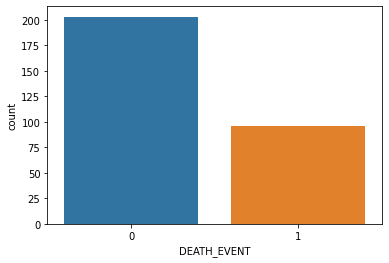

In [ ]:
import seaborn as sns
sns.countplot(y,label="Count")
plt.show()

Box plots of all the features are shown below

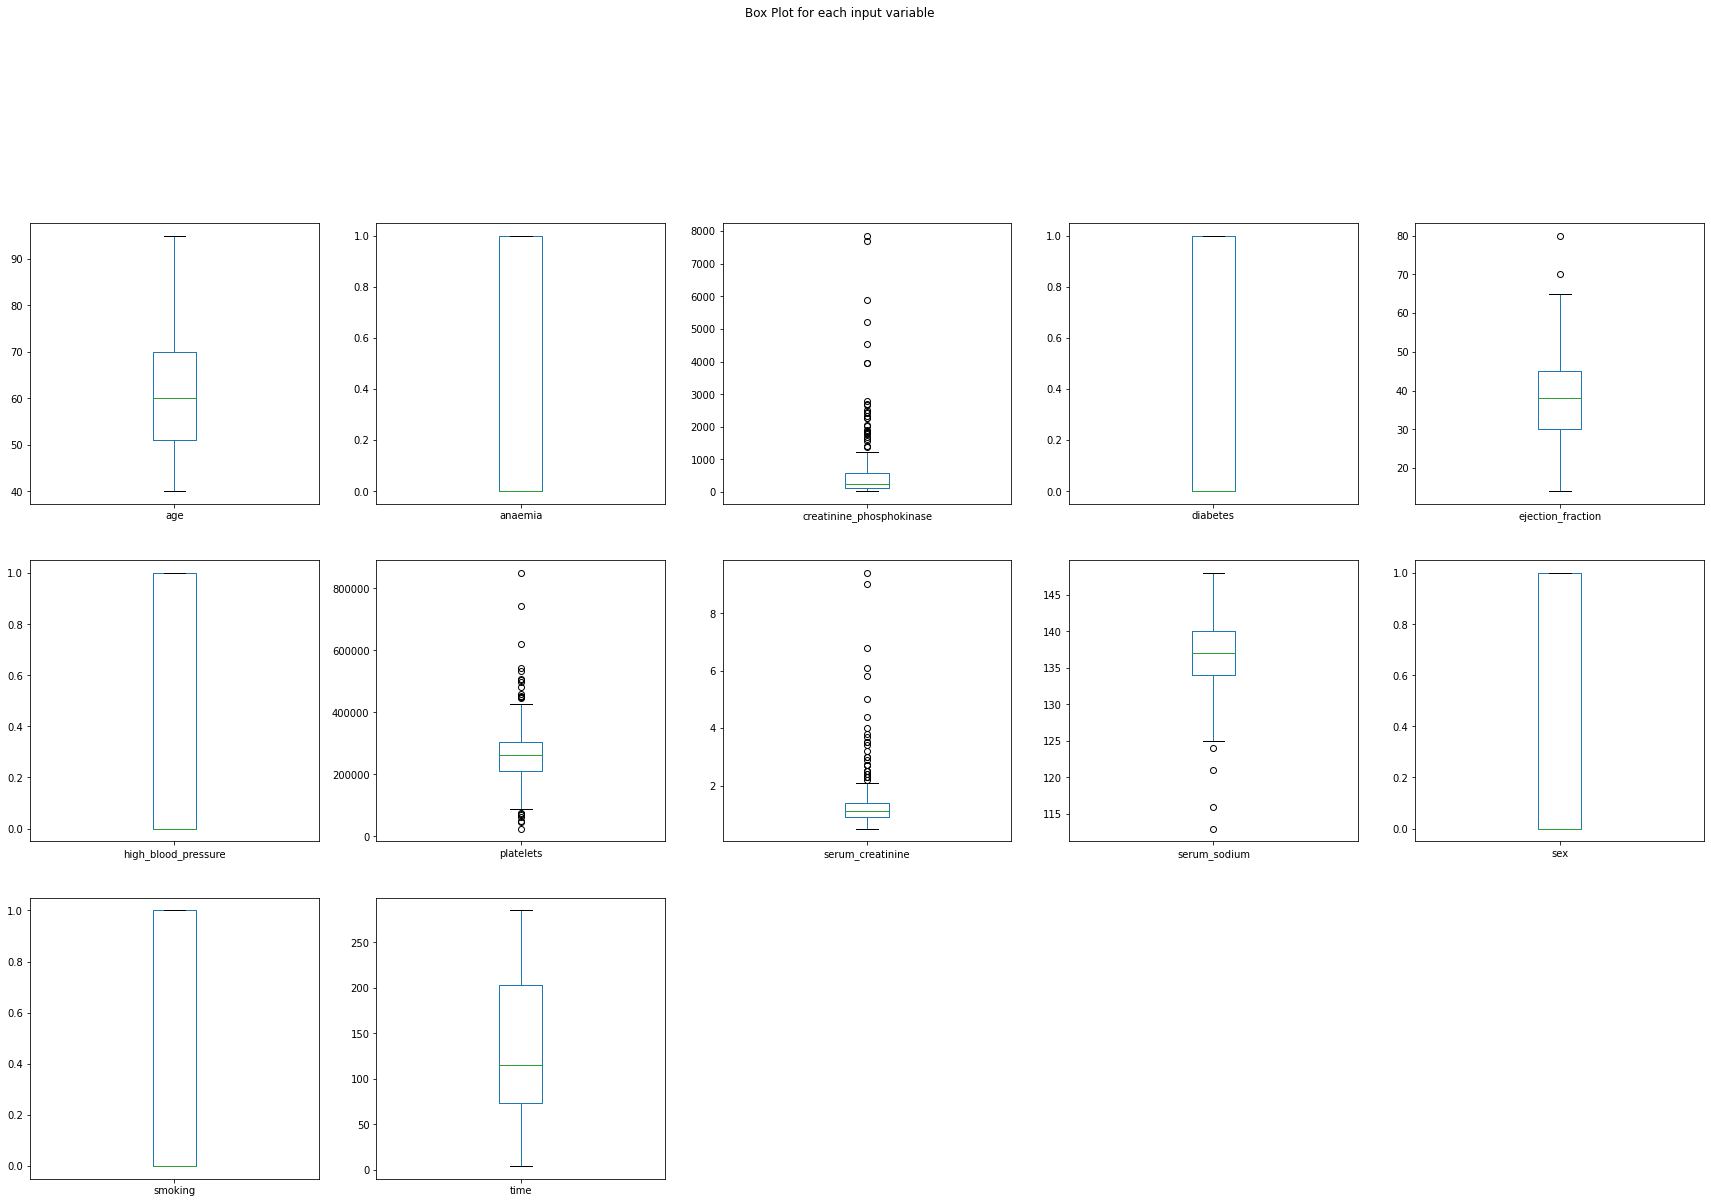

In [ ]:
x.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(30,30), 
                                        title='Box Plot for each input variable')
plt.savefig('death_event')
plt.show()

The histograms of all the features is shown below.

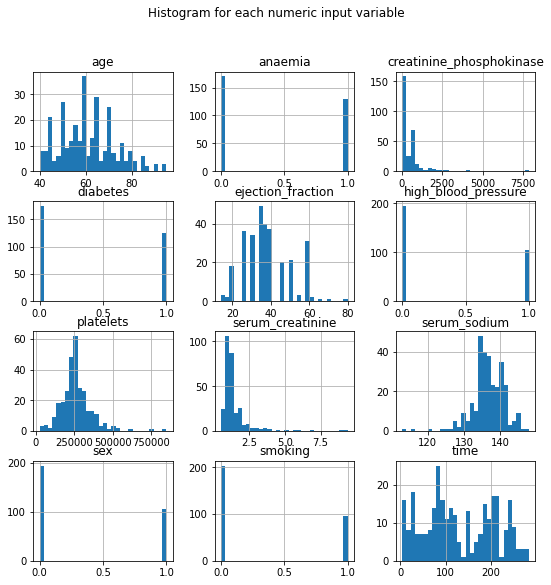

In [ ]:
import pylab as pl
x.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('hist')
plt.show()

**The features importance of all the features is shown below. It shows that the feature of most importance is time. After time it is platelets, serum_creatinine and ejection_fraction. The rest of the features have low importance. Specially diabetes, anaemia, smoking, high blood pressure and sex. While all these features must be important in whether a person has heart failure, this graph shows that it does not necessarily contribute to whether the person will survive after the heart failure. features like time, platelets, serum_cretinine and ejection_fraction**

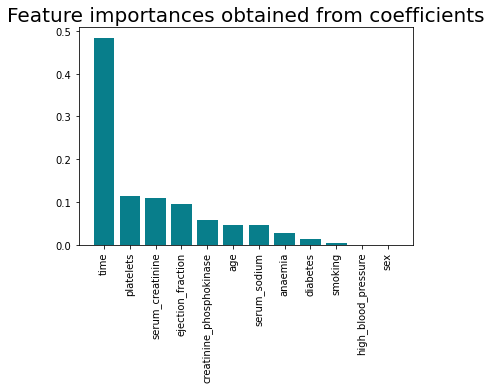

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': regressor_dtr.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

The diagram bellow uses the correlation matrix to show to what degree two features are related to each other. The colour determines the extent of the relation. The lighter the colour, the greater the relation. It shows us that sex and diabetes is somewhat co-related. So is serum sodium and ejection fraction as well as age and strum_creatinine. 

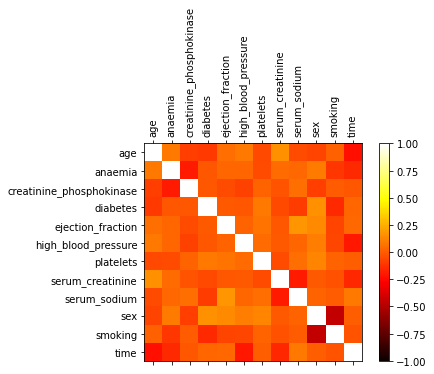

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = x.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='hot', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(x.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(x.columns)
ax.set_yticklabels(x.columns)
plt.show()

Printing the correlation matrix

In [ ]:
corr

age   anaemia  ...   smoking      time
age                       1.000000  0.088006  ...  0.018668 -0.224068
anaemia                   0.088006  1.000000  ... -0.107290 -0.141414
creatinine_phosphokinase -0.081584 -0.190741  ...  0.002421 -0.009346
diabetes                 -0.101012 -0.012729  ... -0.147173  0.033726
ejection_fraction         0.060098  0.031557  ... -0.067315  0.041729
high_blood_pressure       0.093289  0.038182  ... -0.055711 -0.196439
platelets                -0.052354 -0.043786  ...  0.028234  0.010514
serum_creatinine          0.159187  0.052174  ... -0.027414 -0.149315
serum_sodium             -0.045966  0.041882  ...  0.004813  0.087640
sex                      -0.065430  0.094769  ... -0.445892  0.015608
smoking                   0.018668 -0.107290  ...  1.000000 -0.022839
time                     -0.224068 -0.141414  ... -0.022839  1.000000

[12 rows x 12 columns]

Installing lime

In [ ]:
pip install lime

In [ ]:
X = np.array(x)

Selecting 4 random rows from x dataset to see if features which were most important in feature importance contribute the most to the respective result.

In [ ]:
import lime 
import lime.lime_tabular 
import shap 
number_of_rows = x.shape[0]
random_indices = np.random.choice(number_of_rows, size=4, replace=False)

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=x.columns, class_names=[0,1], discretize_continuous=True)

Performing shap and plotting the amount all the features contributed to the result from the 4 randomly chosen rows. 

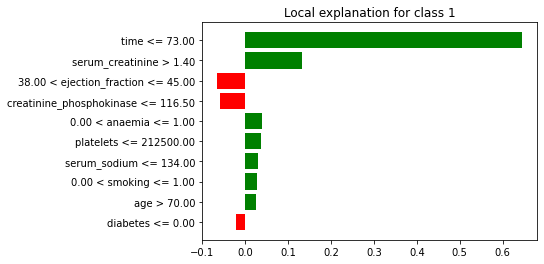

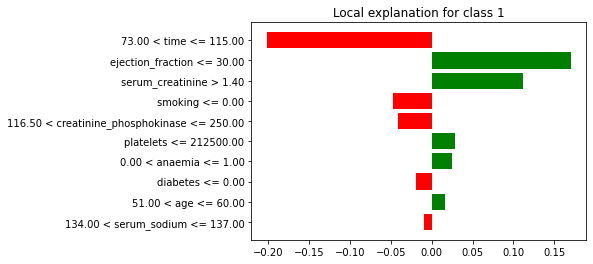

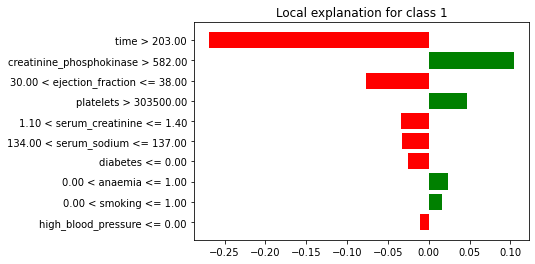

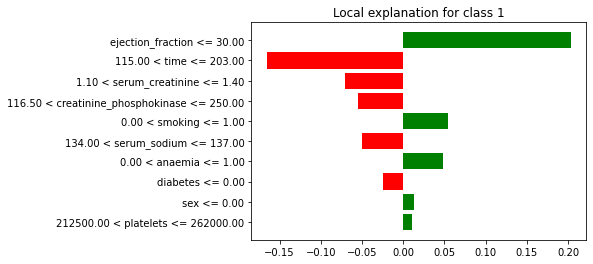

In [ ]:
for i in random_indices:
  exp = explainer.explain_instance(X[i], regressor_dtr.predict_proba)
  exp.as_pyplot_figure()
  exp.show_in_notebook(show_table=True, show_all=False)

Interpret the results obtained. 

In all 4 results it is observe that time, ejection_fraction and serum_creatinine are the most important factors and contribute most to the respective outputs whether they survive or die.It is also observed that sex, platelets, diabetes , anaemia , high blood pressure and age have minimal contribution to the result of these individual outputs. It is known that blood pressure, age, sex play an important part in heart failure, however they do not determine survial of the patient 

As we can see above time, serum creatinine and ejection fraction are the most accurate features. 

Provide BI decision that can be taken based on the result obtained. 

The chances of survival in the follow-up period are majorly dependant on serum certinine and ejection fraction. Other features such as smoking,sex,anaemia, platelets do matter however we can conclude that survival rate is dependant on the earlier factors. Thus while these factors contribute to heart failure they do not necessarily contribute to the chance of survival after a heart failure. When treating patients of heart failure high risk patients can therefore be identified. Also these criterias should be treated and bettered for a better chance of survial